# Data de accidentes viales del estado de Michigan EEUU

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("Car_Accidents.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484513 entries, 0 to 484512
Data columns (total 60 columns):
acc_crsh_id               484513 non-null int64
acc_date_val              484513 non-null int64
acc_milt_time             484376 non-null object
acc_fatl_crsh_ind         484513 non-null int64
acc_injy_crsh_ind         484513 non-null int64
acc_prop_damg_crsh_ind    484513 non-null int64
acc_num_fatl              484513 non-null int64
acc_num_injy              484513 non-null int64
acc_num_injy_a            484513 non-null int64
acc_num_injy_b            484513 non-null int64
acc_num_injy_c            484513 non-null int64
acc_tot_occp              484513 non-null int64
acc_cplt_dspn             483367 non-null float64
acc_num_unit              484513 non-null int64
acc_crsh_type_cd          484476 non-null float64
acc_mdot_crsh_type_cd     484513 non-null int64
acc_spcl_crcm_none        484513 non-null int64
acc_spcl_crcm_deer        484513 non-null int64
acc_spcl_crcm_schl  

In [3]:
df.head()

,acc_crsh_id,acc_date_val,acc_milt_time,acc_fatl_crsh_ind,acc_injy_crsh_ind,acc_prop_damg_crsh_ind,acc_num_fatl,acc_num_injy,acc_num_injy_a,acc_num_injy_b,...,acc_grts_svty_cd,acc_lane_dprt_cd,acc_intr_invl_ind,acc_yung_driv_cd,acc_eldr_driv_cd,acc_ext_crsh_id,acc_crnt_x_cord,acc_crnt_y_cord,acc_cnty_cd,Location_1
0,8519873,20130101,610,0,0,1,0,0,0,0,...,5,0,0,0,84,146463.0,-84.667408,42.450784,23,"(42.4507837368346, -84.6674083588029)"
1,8519893,20130101,33,0,0,1,0,0,0,0,...,5,0,1,24,0,198475.0,-85.587375,42.294433,39,"(42.2944329914783, -85.5873750653790)"
2,8519949,20130101,410,0,0,1,0,0,0,0,...,5,0,0,24,0,113264.0,-85.285138,43.431380,59,"(43.4313804307793, -85.2851384529531)"
3,8520144,20130101,437,0,0,1,0,0,0,0,...,5,1,0,24,0,9563.0,-83.696865,42.465926,47,"(42.4659256928564, -83.6968654534437)"
4,8520308,20130101,1920,0,0,1,0,0,0,0,...,5,0,0,0,0,47061.0,-86.387537,41.834503,11,"(41.8345031396441, -86.3875371986458)"


## Obtenemos indicadores generales de porcentaje de accidentes con fallecimiento o lesiones y promedio de afectados 

In [55]:
print 'Porcentaje de accidentes con fallecidos'
print df.acc_fatl_crsh_ind.mean()*100, '%'
print 'Porcentaje de accidentes con lesionados'
print df.acc_injy_crsh_ind.mean()*100, '%'
print 'Porcentaje de accidentes sin lesionados o fallecidos'
print df.acc_prop_damg_crsh_ind.mean()*100, '%'

print 'Fallecimiento promedio en accidentes fatales'
print df[df['acc_fatl_crsh_ind'] == 1].acc_num_fatl.mean()

print 'Nº de lesionados promedio en accidentes con lesiones'
print df[df['acc_injy_crsh_ind'] == 1].acc_num_injy.mean()



Porcentaje de accidentes con fallecidos
0.30112711114 %
Porcentaje de accidentes con lesionados
17.946886874 %
Porcentaje de accidentes sin lesionados o fallecidos
81.7519860148 %
Fallecimiento promedio en accidentes fatales
1.07539410555
Nº de lesionados promedio en accidentes con lesiones
1.34646656316


### Calculamos el porcentaje de fallecimientos según condiciones de la vía 

In [87]:
k = ['Dry','Wet','Icy','Snowy','Muddy','Slushy','Debris','Other/Unknown']
for i in range(1,9):
    print round(df[df['acc_rd_cond_cd'] == i].acc_fatl_crsh_ind.mean()*100,3),'%  ', k[i-1]
    
print '----------------------------------------------------'
for i in range(1,9):
    print round(df[df['acc_rd_cond_cd'] == i].acc_injy_crsh_ind.mean()*100,2),'%  ', k[i-1]


0.362 %   Dry
0.276 %   Wet
0.156 %   Icy
0.171 %   Snowy
0.447 %   Muddy
0.106 %   Slushy
0.25 %   Debris
0.154 %   Other/Unknown
----------------------------------------------------
19.41 %   Dry
18.55 %   Wet
15.11 %   Icy
12.62 %   Snowy
27.42 %   Muddy
16.64 %   Slushy
29.0 %   Debris
10.67 %   Other/Unknown


### Realizamos el mismo calculo nuevamente, pero con groupby y obteniendo indicadores de porcentaje de numero de lesionados y número de accidentes 

In [80]:
f = {'acc_crsh_id':['count'],'acc_fatl_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100},'acc_injy_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100}}

a = df.groupby(['acc_rd_cond_cd']).agg(f)
a.index = ['Dry','Wet','Icy','Snowy','Muddy','Slushy','Debris','Other/Unknown']
a

acc_fatl_crsh_ind       acc_injy_crsh_ind        acc_crsh_id
                       mean*100   sum          mean*100    sum       count
Dry                    0.361748  1073         19.405290  57559      296615
Wet                    0.276059   195         18.552600  13105       70637
Icy                    0.156421    73         15.110673   7052       46669
Snowy                  0.170890    93         12.623803   6870       54421
Muddy                  0.447094     3         27.421759    184         671
Slushy                 0.106101     8         16.644562   1255        7540
Debris                 0.250000     1         29.000000    116         400
Other/Unknown          0.153997    11         10.667787    762        7143

> *El mayor porcentaje de accidentes con fallecimiento de da con la vía en condiciones fangosas (Muddy), lama la atención que la segunda mayor tasa de porcentaje de fatalidades es con el suelo seco (Dry) o en condiciones normales.  
Respecto a lesiones la mayor tasa se da con escombros (Debris) lo cual parece evidente y luego en condiciones fangosas.*

### Análisis por condiciones de clima 

In [180]:
f = {'acc_crsh_id':{'nº_Acc':'count'},'acc_fatl_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100},'acc_injy_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100}}

a = df.groupby(['acc_wthr_cd']).agg(f)
a.index = ['Clear','Cloudy','Fog/Smoke','Rain','Snow/Blowing Snow','Severe Wind','Sleet/Hail','Other/Unknown']
a

acc_fatl_crsh_ind      acc_injy_crsh_ind        acc_crsh_id
                           mean*100  sum          mean*100    sum      nº_Acc
Clear                      0.334640  862         19.052758  49078      257590
Cloudy                     0.321984  381         17.882345  21160      118329
Fog/Smoke                  0.495786   10         15.270203    308        2017
Rain                       0.279939  104         19.299615   7170       37151
Snow/Blowing Snow          0.146011   84         14.225621   8184       57530
Severe Wind                0.494827   11         12.235717    272        2223
Sleet/Hail                 0.100959    2         17.011610    337        1981
Other/Unknown              0.066033    5          5.599577    424        7572

> *Entre las condiciones de tiempo las de mayor porcentaje de fatalidad son de niebla y viento severo, aunque esta última es la que posee el menor porcentaje de lesiones después de Otros/Desconocidos *

### Análisis por uso de Psicotrópicos 

In [91]:
f = {'acc_crsh_id':['count'],'acc_fatl_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100},'acc_injy_crsh_ind':{'sum':'sum', 'mean*100':lambda x: x.mean()*100}}

a = df.groupby(['acc_alch_invl_ind','acc_drug_invl_ind']).agg(f)
a

acc_fatl_crsh_ind      acc_injy_crsh_ind  \
                                             mean*100  sum          mean*100   
acc_alch_invl_ind acc_drug_invl_ind                                            
0                 0                          0.200618  936         17.167818   
                  1                          5.957201  103         43.666859   
1                 0                          2.040816  300         37.217687   
                  1                          7.868852  120         41.377049   

                                           acc_crsh_id  
                                       sum       count  
acc_alch_invl_ind acc_drug_invl_ind                     
0                 0                  80098      466559  
                  1                    755        1729  
1                 0                   5471       14700  
                  1                    631        1525

> *Aquí podemos ver el impacto que tienen los accidentes donde se involucra alcohol o drogas, donde para un caso normal hay 2 muertes por cada mil accidentes, pero con alcohol pasa a 20, con drogas casi 60 por cada mil y con ambos llega casi a 79*

### Por tipo de Vehículos especiales involucrados  

In [169]:
k =['acc_trk_bus_invl_ind','acc_emg_vehc_invl_ind','acc_orv_invl_ind','acc_snwm_invl_ind','acc_ped_invl_ind','acc_bcyl_invl_ind','acc_fmeq_invl_ind','acc_mycy_invl_ind','acc_trn_invl_ind']
x = np.empty((9,5))

for j,i in zip(range(9),k):
    x[j,0] = round(df[df[i] == 1].acc_fatl_crsh_ind.mean()*100,4)
    x[j,1] = df[df[i] == 1].acc_fatl_crsh_ind.sum()
    x[j,2] = round(df[df[i] == 1].acc_injy_crsh_ind.mean()*100,4)
    x[j,3] = df[df[i] == 1].acc_injy_crsh_ind.sum()
    x[j,4] = df[df[i] == 1].acc_injy_crsh_ind.count()

l = ['Bus','Emerg Veh','Off Road Veh','Snowmobile','Pedestrian','Bicycle','Farm Veh','Motorcycle','Train']
c = ['%Fatality','Nº_F','%Injury','Nº_I','Nº_Acc']
x1 = pd.DataFrame(pd.Series(l),columns =['Type'])
x2 = pd.DataFrame(x, columns = c)
pd.concat([x1,x2],axis=1) 


,Type,%Fatality,Nº_F,%Injury,Nº_I,Nº_Acc
0,Bus,0.7632,149.0,16.7486,3270.0,19524.0
1,Emerg Veh,0.1526,6.0,14.8779,585.0,3932.0
2,Off Road Veh,2.7429,35.0,88.2445,1126.0,1276.0
3,Snowmobile,4.5267,44.0,72.2222,702.0,972.0
4,Pedestrian,6.2672,251.0,82.6467,3310.0,4005.0
5,Bicycle,1.4071,43.0,78.6649,2404.0,3056.0
6,Farm Veh,1.1561,4.0,27.4566,95.0,346.0
7,Motorcycle,3.8310,204.0,73.2770,3902.0,5325.0
8,Train,2.5210,3.0,33.6134,40.0,119.0


> Entre las cosas que más llaman la atención tenemos:   
- Cuando hay motocicletas involucradas el porcentaje de mortalidad aumenta más de 10 frente al global (incluso más alto que la de bicicletas) y la tasa de lesionadas casi 4 veces.
- La alta tasa de fatalidad y lesiones con peatones involucrados no es sorpresa dado que estos están más expuestos.
- La alta tasa de lesionados (o la más alta) cuando hay un vehículo todo terreno involucrado 
- Los Vehículos de emergencia son los únicos que presentan tasas de porcentuales de fallecimientos y lesiones más bajo que los indicadores globales


### Por Edad

In [337]:
print 'Mayores iguales a 60'
print df[df['acc_eldr_driv_cd'] <> 0].acc_fatl_crsh_ind.mean()*100
print df[df['acc_eldr_driv_cd'] <> 0].acc_injy_crsh_ind.mean()*100 
print'-------------------------------------------------'
print'Menores a 60'
print df[df['acc_eldr_driv_cd'] == 0].acc_fatl_crsh_ind.mean()*100
print df[df['acc_eldr_driv_cd'] == 0].acc_injy_crsh_ind.mean()*100

Mayores iguales a 60
0.393051739394
19.8304847949
-------------------------------------------------
Menores a 60
0.27495837178
17.4106716727


In [338]:
print 'Menores iguales a 24'
print df[df['acc_yung_driv_cd'] <> 0].acc_fatl_crsh_ind.mean()*100
print df[df['acc_yung_driv_cd'] <> 0].acc_injy_crsh_ind.mean()*100 
print'-------------------------------------------------'
print 'Mayores a 24'
print df[df['acc_yung_driv_cd'] == 0].acc_fatl_crsh_ind.mean()*100
print df[df['acc_yung_driv_cd'] == 0].acc_injy_crsh_ind.mean()*100

Menores iguales a 24
0.251767150442
20.7647347522
-------------------------------------------------
Mayores a 24
0.324764515203
16.5974812436


> *En este caso las personas jóvenes tienen tasas menores al global, mientas que las de personas mayores a 60 tienen mayor riesgo de fatalidad y lesión*

### Tabla de Calor vehículos especiales y condición de la vía 

In [298]:
import math
z = np.empty((9,8))
w = np.empty((9,8))
k = ['acc_trk_bus_invl_ind','acc_emg_vehc_invl_ind','acc_orv_invl_ind','acc_snwm_invl_ind','acc_ped_invl_ind','acc_bcyl_invl_ind','acc_fmeq_invl_ind','acc_mycy_invl_ind','acc_trn_invl_ind']

for i in range(1,9):
    for j,l in zip(range(9),k):
        z[j,i-1] = round(df[(df[l] == 1) & (df['acc_rd_cond_cd'] == i)].acc_injy_crsh_ind.mean()*100,3)
        w[j,i-1] = round(df[(df[l] == 1) & (df['acc_rd_cond_cd'] == i)].acc_crsh_id.count(),0)
        if math.isnan(z[j,i-1]):
            z[j,i-1] = 0
   

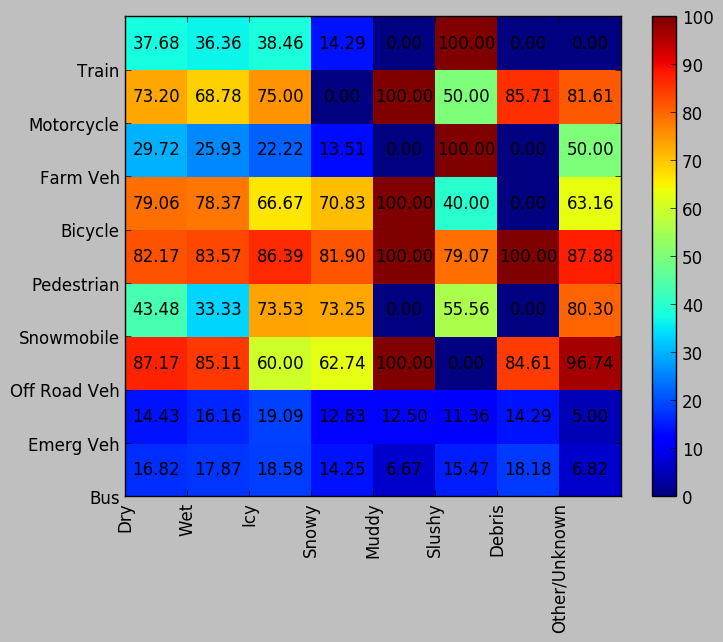

In [152]:
import matplotlib.pyplot as plt
plt.style.use('classic')
z

heatmap = plt.pcolor(z)

for y in range(z.shape[0]):
    for x in range(z.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % z[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
     
            
plt.colorbar(heatmap)
x = range(8)
lbx = ['Dry','Wet','Icy','Snowy','Muddy','Slushy','Debris','Other/Unknown']
plt.xticks(x, lbx, rotation='vertical')
y = range(9)
lby = ['Bus','Emerg Veh','Off Road Veh','Snowmobile','Pedestrian','Bicycle','Farm Veh','Motorcycle','Train']
plt.yticks(y, lby, rotation='horizontal')
plt.show()

In [299]:
pd.DataFrame(w, columns = lbx, index = lby)

,Dry,Wet,Icy,Snowy,Muddy,Slushy,Debris,Other/Unknown
Bus,11176.0,2848.0,2336.0,2667.0,15.0,362.0,11.0,88.0
Emerg Veh,2447.0,532.0,440.0,413.0,8.0,44.0,7.0,40.0
Off Road Veh,826.0,47.0,15.0,51.0,41.0,1.0,13.0,276.0
Snowmobile,23.0,12.0,102.0,755.0,0.0,9.0,0.0,66.0
Pedestrian,2861.0,645.0,147.0,232.0,3.0,43.0,4.0,66.0
Bicycle,2746.0,245.0,9.0,24.0,2.0,10.0,1.0,19.0
Farm Veh,249.0,27.0,27.0,37.0,1.0,1.0,0.0,4.0
Motorcycle,4918.0,237.0,8.0,1.0,11.0,2.0,56.0,87.0
Train,69.0,11.0,13.0,21.0,1.0,2.0,0.0,1.0


### Mapa de puntos resaltando los accidentes con fatalidad y los demás 

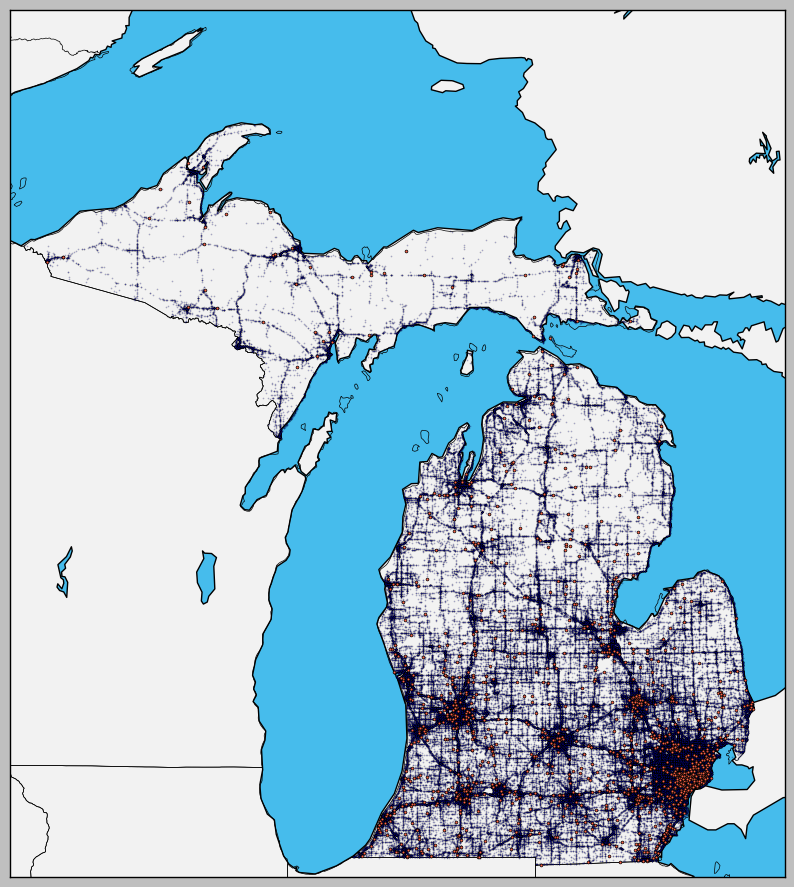

In [139]:
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='i', # c, l, i, h, f or None
            projection='merc',
            lat_0=45, lon_0=-86,
            llcrnrlon=-90.57, llcrnrlat= 41.6, urcrnrlon=-82.07, urcrnrlat=48.32)


m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('cb_2015_us_state_5m', 'cb_2015_us_state_5m')

x, y = m(df[(df['acc_fatl_crsh_ind'] == 0) & (df['acc_injy_crsh_ind'] == 0)].acc_crnt_x_cord.tolist(), df[(df['acc_fatl_crsh_ind'] == 0) & (df['acc_injy_crsh_ind'] == 0)].acc_crnt_y_cord.tolist()) 
m.plot(x,y, 'o', markersize=0.8, color='b', alpha=0.2)
    
x, y = m(df[(df['acc_fatl_crsh_ind'] == 1) & (df['acc_injy_crsh_ind'] == 0)].acc_crnt_x_cord.tolist(), df[(df['acc_fatl_crsh_ind'] == 1) & (df['acc_injy_crsh_ind'] == 0)].acc_crnt_y_cord.tolist()) 
m.plot(x,y, 'o', markersize=2, color='tomato', alpha=1)



plt.show()

> *Se puede observar como la mayor concentración de accidentes esta donde se ubica el área metropolitana de Detroit, así como las concentraciones de puntos se ubican posiblemente en otras ciudades, también podemos ver como los puntos de accidentes prácticamente pintan las vías*

### Análisis por día de la semana 

In [184]:
import datetime 
df['weekday'] = pd.to_datetime(df.acc_date_val, format='%Y%m%d').dt.dayofweek

In [ ]:
a = df.groupby(['acc_wthr_cd']).agg(f)

In [185]:
f = {'acc_crsh_id':{'nº_Acc':'count'},'acc_fatl_crsh_ind':{'nº_fatl':'sum'},'acc_injy_crsh_ind':{'nº_injy':'sum'}}

a = df.groupby(['acc_date_val','weekday']).agg(f)
a

,,acc_fatl_crsh_ind,acc_injy_crsh_ind,acc_crsh_id
,,nº_fatl,nº_injy,nº_Acc
acc_date_val,weekday,,,
20130101,1,0,80,555
20130102,2,0,114,750
20130103,3,2,126,764
20130104,4,6,136,814
20130105,5,4,108,689
20130106,6,1,115,708
20130107,0,1,130,780
20130108,1,1,105,727


In [200]:
b = a.reset_index()
b.iloc[:,1:].groupby(['weekday']).mean()

,acc_fatl_crsh_ind,acc_injy_crsh_ind,acc_crsh_id
,nº_fatl,nº_injy,nº_Acc
weekday,,,
0,2.174419,138.372093,806.651163
1,1.896552,145.735632,837.908046
2,1.965517,152.655172,867.045977
3,2.195402,155.793103,878.988506
4,2.620690,160.689655,896.126437
5,3.344828,138.390805,721.954023
6,2.597701,109.436782,569.712644


> *El mayor número de accidentes con muertes en promedio se dan los sábados. luego de lesiones y accidentes en general es el día viernes* 

### Análisis según la hora del día 

In [296]:
df2 = df[(df.acc_milt_time<>'UNK ')& df.acc_milt_time.notnull()].copy()

h = df2.acc_milt_time.copy()
h = h[h.notnull() & (h<>'UNK ')]
h = h.astype('float')
df2['hour'] = (h - h%100)/100

f = {'acc_crsh_id':{'nº_Acc':'count'},'acc_fatl_crsh_ind':{'nº_fatl':'sum'},'acc_injy_crsh_ind':{'nº_injy':'sum'}}

a = df2.groupby(['acc_date_val','hour']).agg(f)
a


acc_fatl_crsh_ind acc_injy_crsh_ind acc_crsh_id
                            nº_fatl           nº_injy      nº_Acc
acc_date_val hour                                                
20130101     0.0                  0                 4          24
             1.0                  0                14          46
             2.0                  0                 5          37
             3.0                  0                 6          28
             4.0                  0                 4          30
             5.0                  0                 3          21
             6.0                  0                 0          19
             7.0                  0                 1          10
             8.0                  0                 1           8
             9.0                  0                 1          12
             10.0                 0                 2          14
             11.0                 0                 2          14
             12.0                 0                 3          21
             13.0                 0                 4          18
             14.0                 0                 4          26
             15.0                 0                 1          14
             16.0                 0                 3          16
             17.0                 0                 3          31
             18.0                 0                 7          43
             19.0                 0                 4          39
             20.0                 0                 4          18
             21.0                 0                 1          24
             22.0                 0                 1          20
             23.0                 0                 1          17
20130102     0.0                  0                 0           7
             1.0                  0                 1           7
             2.0                  0                 1          10
             3.0                  0                 0           5
             4.0                  0                 0          11
             5.0                  0                 2          19
...                             ...               ...         ...
20140830     16.0                 0                 1           8
             17.0                 0                 3           5
             18.0                 0                 1           6
             19.0                 0                 0           4
             20.0                 0                 1           3
             21.0                 0                 3           5
             22.0                 0                 0           2
             23.0                 0                 1           2
20140831     0.0                  0                 0           1
             1.0                  0                 0           1
             2.0                  0                 0           4
             3.0                  0                 0           3
             5.0                  0                 0           2
             6.0                  0                 0           1
             7.0                  0                 0           1
             8.0                  0                 0           1
             10.0                 0                 1           1
             11.0                 0                 1           1
             12.0                 0                 1           3
             13.0                 0                 0           1
             14.0                 0                 0           2
             15.0                 0                 1           3
             16.0                 0                 0           1
             17.0                 0                 1           1
             18.0                 0                 0           2
             19.0                 0                 0           1
             20.0                 0                 0     

In [297]:
b = a.reset_index()
b.iloc[:,1:].groupby(['hour']).mean()

,acc_fatl_crsh_ind,acc_injy_crsh_ind,acc_crsh_id
,nº_fatl,nº_injy,nº_Acc
hour,,,
0.0,0.105263,2.567434,14.366776
1.0,0.074013,2.246711,12.069079
2.0,0.108553,2.317434,11.835526
3.0,0.077558,1.603960,9.013201
4.0,0.051325,1.337748,8.983444
5.0,0.060855,1.996711,16.192434
6.0,0.074013,3.289474,26.825658
7.0,0.090461,6.356908,44.412829


> *En general el mayor número de accidentes, lesiones y muertes en promedio se dan a las 17 horas (probablemente relacionado con la salida del trabajo)*

### Tabla de calor días y horas 

In [342]:
import math
z = np.empty((7,24))
for i in range(7):
    for j in range(24):
        z[i,j] = df2[(df['weekday'] == i) & (df2['hour'] == j)].acc_crsh_id.count()/1000
        if math.isnan(z[i,j]):
            z[i,j] = 0

C:\Users\edibo\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


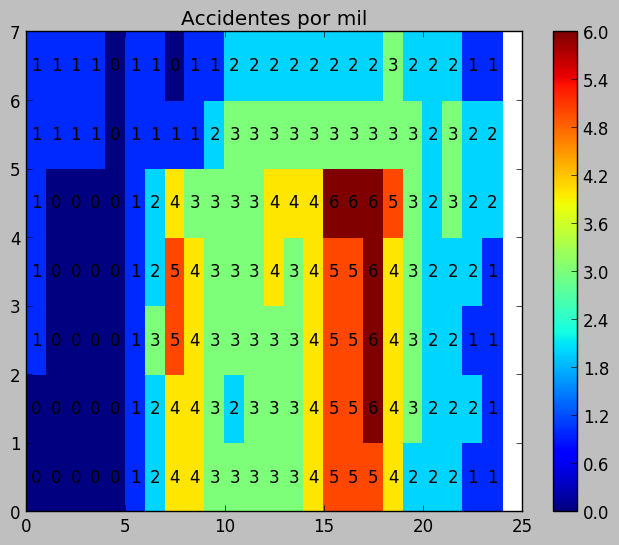

In [343]:
import matplotlib.pyplot as plt
plt.style.use('classic')
z

heatmap = plt.pcolor(z)

for y in range(z.shape[0]):
    for x in range(z.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % z[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
     
plt.title(u'Accidentes por mil')            
plt.colorbar(heatmap)
plt.show()

> *La mayor concentración de número de accidentes se da de lunes a viernes de las 14 a 18 horas y de 7 a 8, entorno a las entradas y salidas laborales*

In [345]:
import math
z = np.empty((7,24))
for i in range(7):
    for j in range(24):
        z[i,j] = df2[(df['weekday'] == i) & (df2['hour'] == j)].acc_fatl_crsh_ind.mean()*100
        if math.isnan(z[i,j]):
            z[i,j] = 0

C:\Users\edibo\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


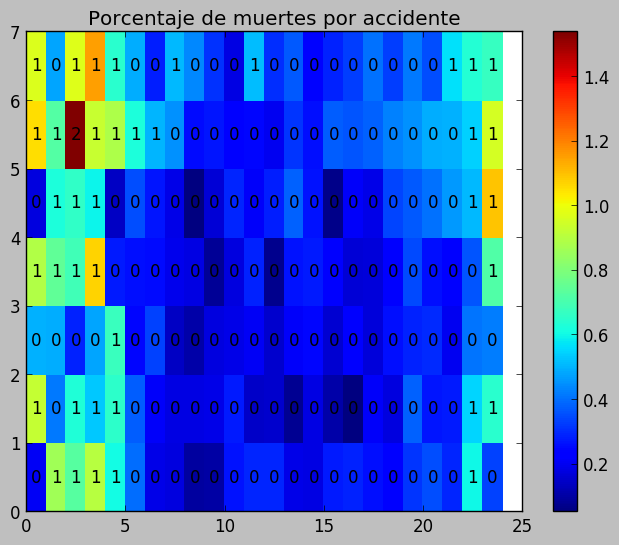

In [346]:
import matplotlib.pyplot as plt
plt.style.use('classic')
z

heatmap = plt.pcolor(z)

for y in range(z.shape[0]):
    for x in range(z.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % z[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
     
plt.title(u'Porcentaje de muertes por accidente')             
plt.colorbar(heatmap)
plt.show()

### Mapa para accidentes de lunes a viernes de las 15 hasta las 18 horas 

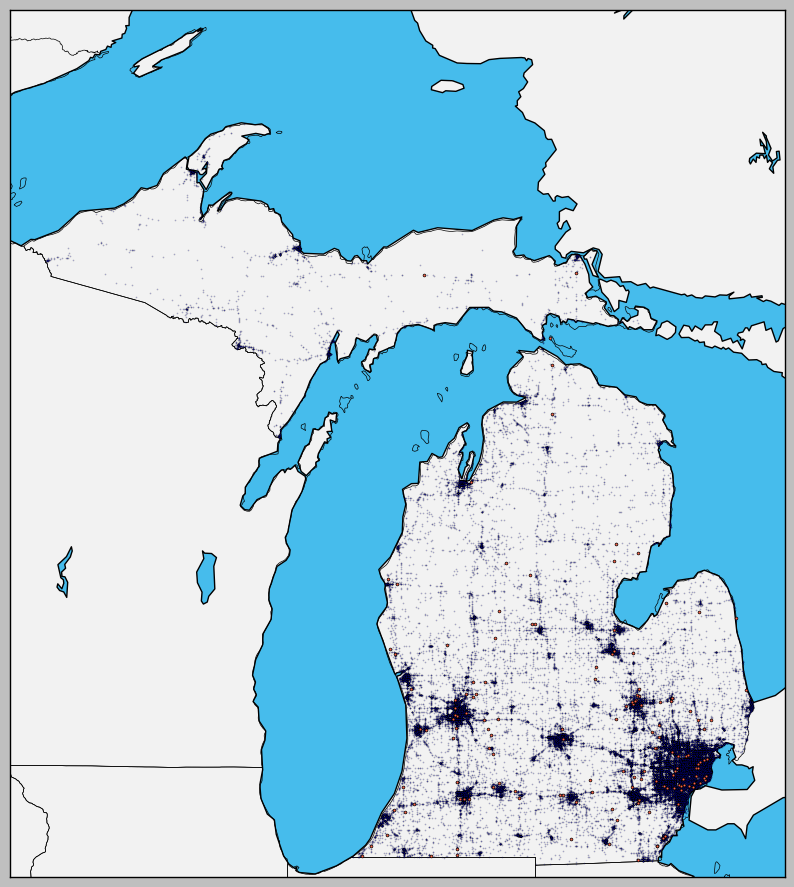

In [335]:
df3 = df2[(df2['weekday'] >= 0) & (df2['weekday'] < 5) & (df2['hour'] > 14) & (df2['hour'] < 18)]

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='i', # c, l, i, h, f or None
            projection='merc',
            lat_0=45, lon_0=-86,
            llcrnrlon=-90.57, llcrnrlat= 41.6, urcrnrlon=-82.07, urcrnrlat=48.32)


m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('cb_2015_us_state_5m', 'cb_2015_us_state_5m')

x, y = m(df3[(df3['acc_fatl_crsh_ind'] == 0) & (df3['acc_injy_crsh_ind'] == 0)].acc_crnt_x_cord.tolist(), df3[(df3['acc_fatl_crsh_ind'] == 0) & (df3['acc_injy_crsh_ind'] == 0)].acc_crnt_y_cord.tolist()) 
m.plot(x,y, 'o', markersize=0.8, color='b', alpha=0.2)
    
x, y = m(df3[(df3['acc_fatl_crsh_ind'] == 1) & (df3['acc_injy_crsh_ind'] == 0)].acc_crnt_x_cord.tolist(), df3[(df3['acc_fatl_crsh_ind'] == 1) & (df3['acc_injy_crsh_ind'] == 0)].acc_crnt_y_cord.tolist()) 
m.plot(x,y, 'o', markersize=2, color='tomato', alpha=1)



plt.show()

> *La concentración de accidentes se mantiene en las ciudades o áreas metropolitanas y parece ser menor en proporción en las demás zonas *